# I. Text Segmentation

Text Segmentation is the process of transforming text into meaningful units. These units can be words, sentences or different topics. 

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize

text = "CODE is founded by Mr. Bachem. Studying at CODE will be unlike any other higher education experience. Our intensive, interdisciplinary bachelor’s programs are designed to dramatically improve the way you work and to prepare you for the reality of tomorrow’s workplace."

ValueError: unknown locale: UTF-8

In [ ]:
# split it into sentences
print(sent_tokenize(text))

In [ ]:
# split into words
print(word_tokenize(text))

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

text = "beneath the extraodrinary staircase..."

tokenize= sent_tokenize(text)


# II. Stop Words & Word Segmentation
Also part of Natural Language are words that are basically useless, which are referred to as "stop words". Since we dont want that these words extend our processing time or take up unnecessary space in our database, we will remove them. 

In [ ]:
# Removing stop words from text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

text = """CODE is founded by Mr. Bachem. Studying at CODE will be unlike 
any other higher education experience. Our intensive, interdisciplinary 
bachelor’s programs are designed to dramatically improve the way you work 
and to prepare you for the reality of tomorrow’s workplace."""

In [ ]:
# defining the stop words we will use
stop_words = set(stopwords.words('english'))

tokens = word_tokenize(text)

In [ ]:
# filter the text for stop words
filtered_sentence = [w for w in tokens if not w in stop_words]
filtered_sentence = []

for w in tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

In [ ]:
# show just the tokenized text
print(tokens)

In [ ]:
# show filtered tokenized text
print(filtered_sentence)

# III. Stemming 

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

#### Stemming single words:

In [ ]:
example_words = ["ride","riding"]

In [ ]:
for w in example_words:
    print(ps.stem(w))

#### Stemming sentences:

In [ ]:
new_text = """CODE is a newly founded private university of applied sciences that is embedded into the vibrant 
network of Berlin's digital economy."""

In [ ]:
words = word_tokenize(new_text)

for w in words:
    print(ps.stem(w))

# IV. Parsing (Speech Tagging & Chunking)

## 1. Speech Tagging

Speech Tagging in NLTK is the process of labeling words in a sentence as nouns, adjectives, verbs and more. Below you can the list of tags it is able to tag: 

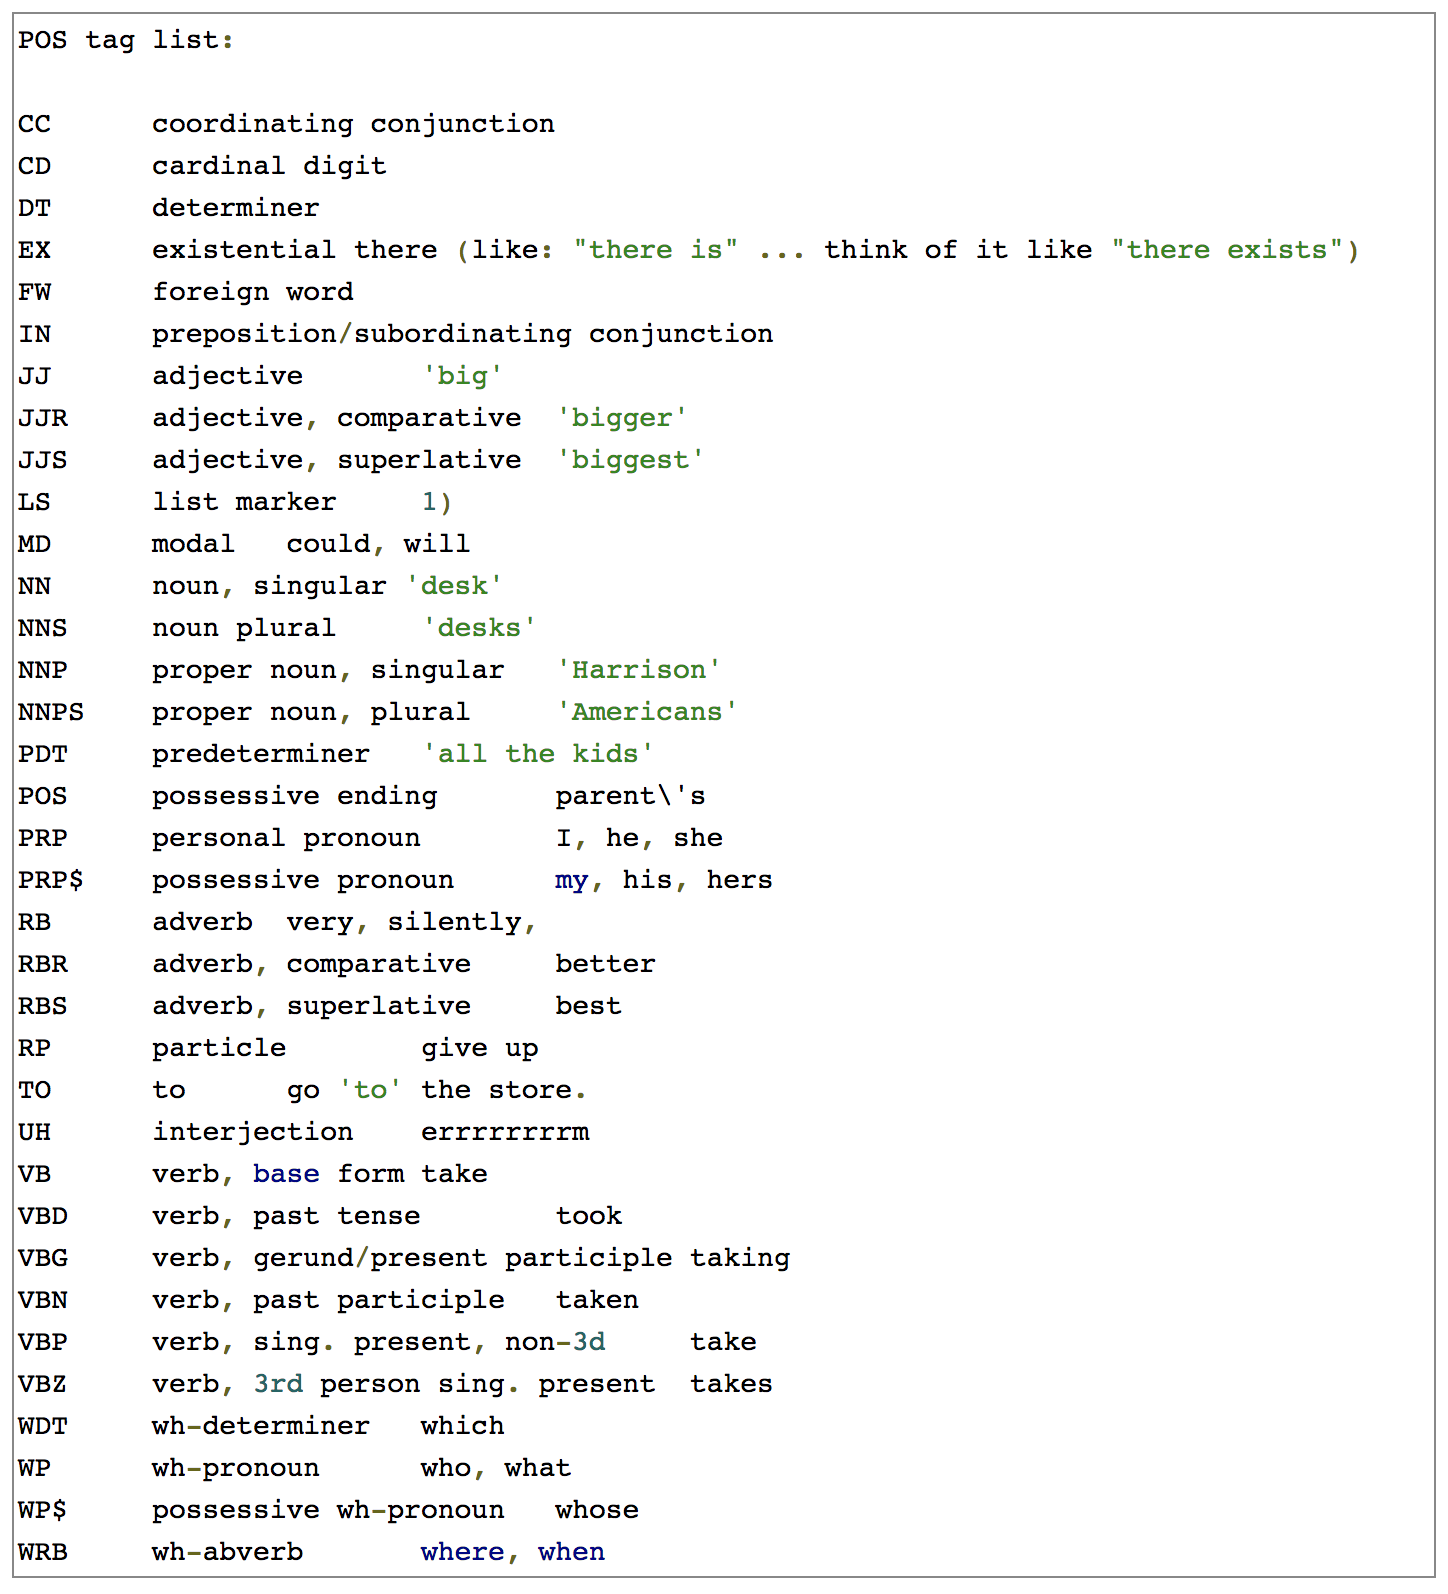

Fortunately, NLTK provides us with a sentence tokenizer called the "PunktSentenceTokenizer", which is a un-supervised ML algorithm that can be trained on any text corpus you wish to. 

In [ ]:
import nltk
from nltk.tokenize import PunktSentenceTokenizer

In [ ]:
# using novels by chesterton
from nltk.corpus import gutenberg
test = gutenberg.raw("chesterton-ball.txt")
train = gutenberg.raw("chesterton-brown.txt")
print(test)

In [ ]:
# train tokenizer
custom_sent_tokenizer = PunktSentenceTokenizer(train)
# tokenize chesterton ball
tokenized = custom_sent_tokenizer.tokenize(test)

In [ ]:
def tag_text():
    try:
        for i in tokenized[:7]:
            actual_words = nltk.word_tokenize(i)
            tagged = nltk.pos_tag(actual_words)
            print(tagged)

    except Exception as e:
        print(str(e))

tag_text()

## 2. Chunking Text

Chunking is the process of grouping words into more meaningful junks than just the speech tags. This can be things such as "noun phrases" or "verb phrases". With chunking you can get a parse tree.

We will search for chunks that correspond to individual noun phrases. 

In [ ]:
# using pre-tagged text out of simplicity
text = [("the", "DT"), ("huge", "JJ"), ("german", "JJ"), ("Rottweiler", "NN"), 
        ("barked", "VBD"), ("at", "IN"),  ("the", "DT"), ("cat", "NN")] 

In [ ]:
# define a noun-phrase as:
# np = determiner + adjective + singular noun
grammar = "NP: {<DT>?<JJ>*<NN>}" 

# apply grammar to regexparser
cp = nltk.RegexpParser(grammar)

# do the chunking
result = cp.parse(text) 
print(result)

Perfect! Our system detected "the huge german rottweiler" as noun-phrase. The corresponding parse tree would look like this:

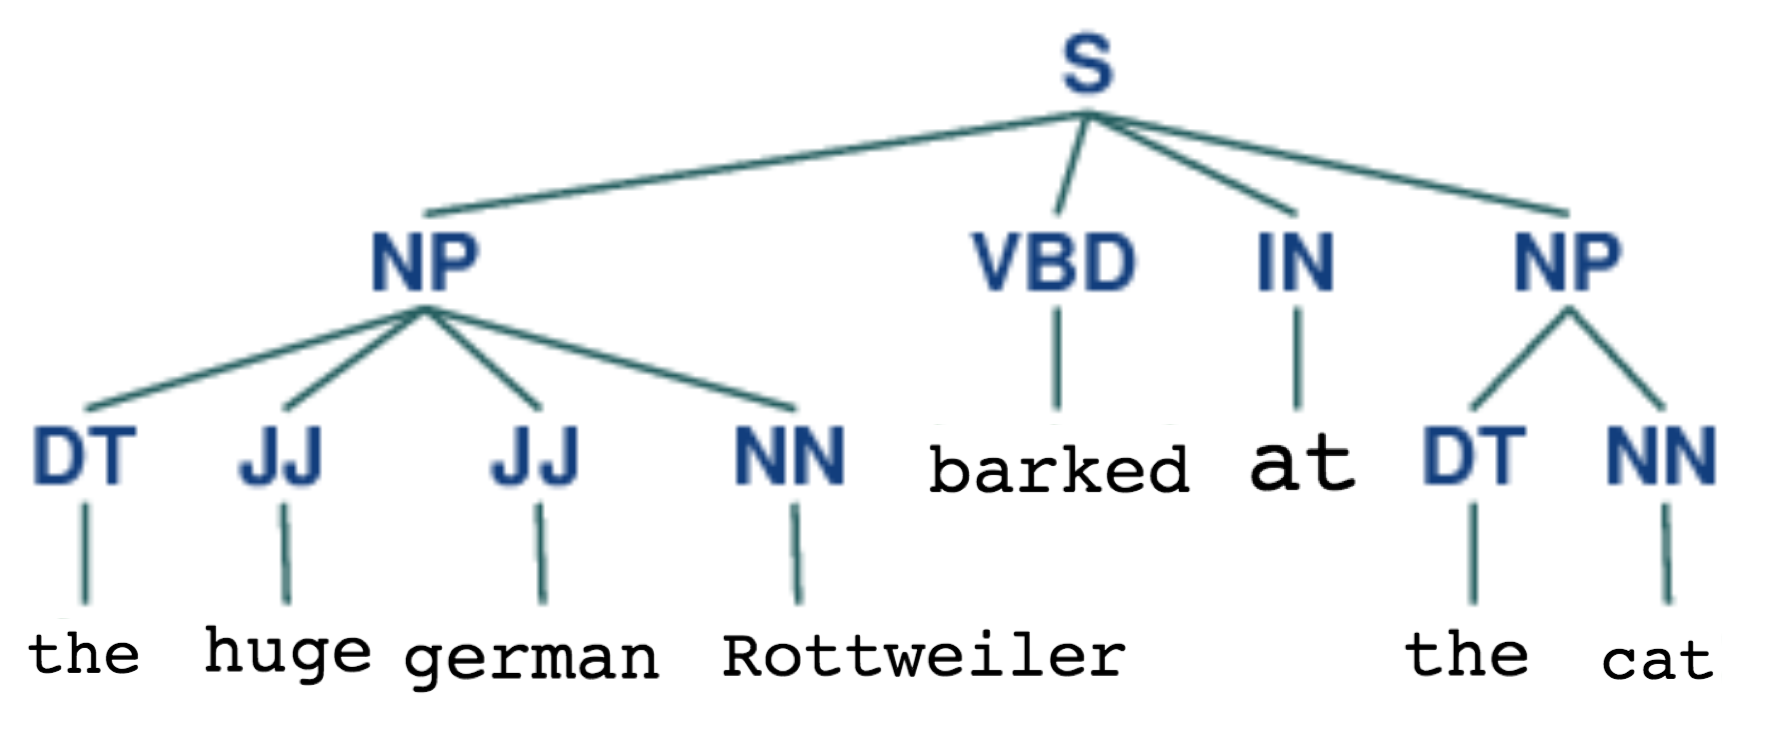

# V. Sentiment Analysis using Keras

Blogpost:
https://towardsdatascience.com/how-to-build-a-neural-network-with-keras-e8faa33d0ae4

In [ ]:
import numpy as np
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)
def vectorize(sequences, dimension = 10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i, sequence] = 1
 return results
 
data = vectorize(data)
targets = np.array(targets).astype("float32")
test_x = data[:10000]
test_y = targets[:10000]
train_x = data[10000:]
train_y = targets[10000:]
model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()
# compiling the model
model.compile(
 optimizer = "adam",
 loss = "binary_crossentropy",
 metrics = ["accuracy"]
)
results = model.fit(
 train_x, train_y,
 epochs= 2,
 batch_size = 500,
 validation_data = (test_x, test_y)
)
print("Test-Accuracy:", np.mean(results.history["val_acc"]))

### Example of a IMDB Review:

In [ ]:
from keras.datasets import imdb
(training_data, training_targets), (testing_data, testing_targets) = imdb.load_data(num_words=10000)
data = np.concatenate((training_data, testing_data), axis=0)
targets = np.concatenate((training_targets, testing_targets), axis=0)

In [ ]:
index = imdb.get_word_index()
reverse_index = dict([(value, key) for (key, value) in index.items()]) 
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )
print(decoded)
print("Label:", targets[0], ", which means positive.")